In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches
from matplotlib.patches import Patch
import os

In [2]:
# --- Setup Function ---
def setup_plot_style():
    plt.style.use('default')  # Reset style first
    plt.rcParams['font.family'] = 'Times New Roman'
    plt.rcParams['axes.edgecolor'] = 'black'
    plt.rcParams['axes.linewidth'] = 1.5
    plt.rcParams['font.size'] = 14
    plt.rcParams['xtick.labelsize'] = 14
    plt.rcParams['ytick.labelsize'] = 14

# calling the function for setup
setup_plot_style()

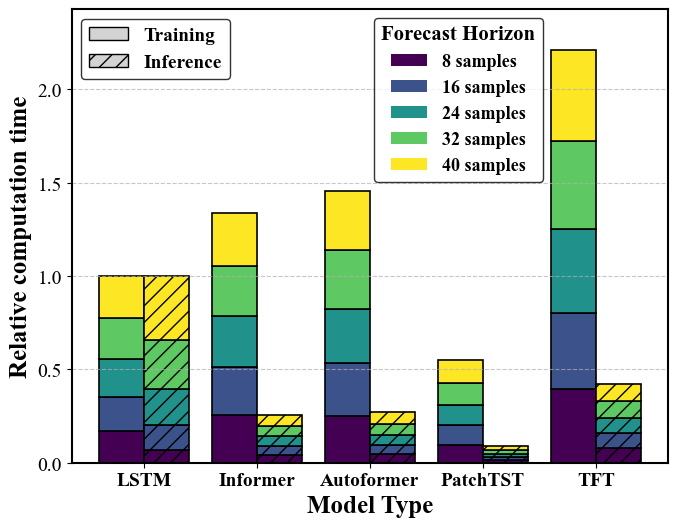

In [3]:
# --- Plot 1: Relative Computation Time ---
fig, ax = plt.subplots(figsize=(7, 5.5))

models = ['LSTM', 'Informer', 'Autoformer', 'PatchTST', 'TFT']
horizons = [8, 16, 24, 32, 40]
legend_labels = [f'{h} samples' for h in horizons]

base_training_times = {
    'LSTM': [150, 165, 180, 195, 210],
    'Informer': [220, 230, 240, 250, 260],
    'Autoformer': [230, 245, 260, 275, 290],
    'PatchTST': [90, 95, 100, 105, 110],
    'TFT': [350, 370, 390, 410, 430]
}
base_inference_times_ms = {
    'LSTM': [8.0, 16.0, 24.0, 32.0, 40.0],
    'Informer': [5.0, 5.5, 6.0, 6.5, 7.0],
    'Autoformer': [5.5, 6.0, 6.5, 7.0, 7.5],
    'PatchTST': [1.5, 1.8, 2.1, 2.4, 2.7],
    'TFT': [9.0, 9.5, 10.0, 10.5, 11.0]
}

rng = np.random.default_rng(42)
training_data = {m: np.array(t)*(1+(rng.random(len(h))-0.5)*0.1)
                 for m, t, h in zip(base_training_times.keys(), base_training_times.values(), [horizons]*len(models))}
inference_data = {m: np.array(t)*(1+(rng.random(len(h))-0.5)*0.1)
                  for m, t, h in zip(base_inference_times_ms.keys(), base_inference_times_ms.values(), [horizons]*len(models))}

lstm_train_total = np.sum(training_data['LSTM'])
lstm_infer_total = np.sum(inference_data['LSTM'])
relative_training_data = {m: t/lstm_train_total for m, t in training_data.items()}
relative_inference_data = {m: i/lstm_infer_total for m, i in inference_data.items()}

x = np.arange(len(models))
width = 0.4
colors = plt.cm.viridis(np.linspace(0, 1, len(horizons)))

bottom_train = np.zeros(len(models))
for i in range(len(horizons)):
    vals = np.array([relative_training_data[m][i] for m in models])
    ax.bar(x - width/2, vals, width, bottom=bottom_train,
           color=colors[i], edgecolor='black', linewidth=1.2)
    bottom_train += vals

bottom_infer = np.zeros(len(models))
for i in range(len(horizons)):
    vals = np.array([relative_inference_data[m][i] for m in models])
    ax.bar(x + width/2, vals, width, bottom=bottom_infer,
           color=colors[i], edgecolor='black', linewidth=1.2, hatch='//')
    bottom_infer += vals

legend_elements = [
    Patch(facecolor='lightgrey', edgecolor='black', label='Training'),
    Patch(facecolor='lightgrey', edgecolor='black', hatch='//', label='Inference')
]
leg1 = ax.legend(handles=legend_elements,
                 loc='upper left', bbox_to_anchor=(0.0, 1),
                 fontsize=14, frameon=True)
leg1.get_frame().set_edgecolor('black')
for text in leg1.get_texts(): text.set_fontweight('bold')
ax.add_artist(leg1)

color_patches = [Patch(facecolor=colors[i], label=legend_labels[i]) for i in range(len(horizons))]

leg2 = ax.legend(handles=color_patches,
                 title='Forecast Horizon',
                 loc='upper right', bbox_to_anchor=(0.805, 1),
                 fontsize=13, title_fontsize=15, frameon=True)
leg2.get_frame().set_edgecolor('black')
for text in leg2.get_texts(): text.set_fontweight('bold')
leg2.get_title().set_fontweight('bold')

ax.set_ylabel('Relative computation time', fontsize=18, fontweight='bold')
ax.set_xlabel('Model Type', fontsize=18, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(models,fontsize=14, fontweight='bold')
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.margins(y=0.1)

fig.tight_layout()
#fig.savefig('computation_time.pdf', bbox_inches='tight')
#fig.savefig('computation_time.eps', bbox_inches='tight')

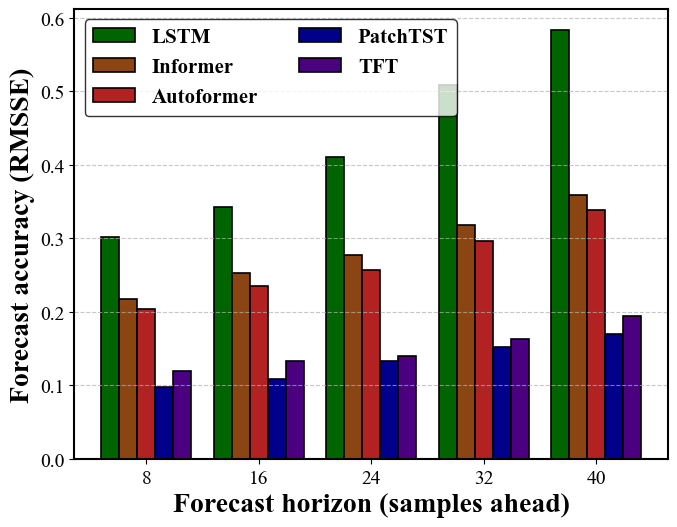

In [4]:
# --- Plot 2: Forecast Accuracy ---
fig, ax = plt.subplots(figsize=(7, 5.5))

models = ['LSTM', 'Informer', 'Autoformer', 'PatchTST', 'TFT']
horizons = [8, 16, 24, 32, 40]

base_rmsse = {
    'LSTM': [0.30, 0.35, 0.42, 0.50, 0.58],
    'Informer': [0.22, 0.25, 0.28, 0.32, 0.36],
    'Autoformer': [0.20, 0.23, 0.26, 0.30, 0.34],
    'PatchTST': [0.10, 0.11, 0.13, 0.15, 0.17],
    'TFT': [0.12, 0.13, 0.14, 0.16, 0.19]
}

rng = np.random.default_rng(43)
rmsse_data = {m: np.array(v) * (1 + (rng.random(len(horizons)) - 0.5) * 0.05)
              for m, v in base_rmsse.items()}

x = np.arange(len(horizons))
n_models = len(models)
width = 0.8 / n_models
colors = ['#006400', '#8B4513', '#B22222', '#00008B', '#4B0082']

for i, m in enumerate(models):
    offset = (i - n_models / 2) * width + width / 2
    ax.bar(x + offset, rmsse_data[m], width, label=m,
           color=colors[i], edgecolor='black', linewidth=1.2)

ax.set_xlabel('Forecast horizon (samples ahead)', fontsize=20, fontweight='bold')
ax.set_ylabel('Forecast accuracy (RMSSE)', fontsize=20, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(horizons)
leg = ax.legend(fontsize=15, ncol=2, loc='upper left', bbox_to_anchor=(0, 1), frameon=True)
leg.get_frame().set_edgecolor('black')
for text in leg.get_texts():
    text.set_fontweight('bold')
ax.grid(axis='y', linestyle='--', alpha=0.7)

fig.tight_layout()
#fig.savefig('forecast_accuracy.pdf', bbox_inches='tight')

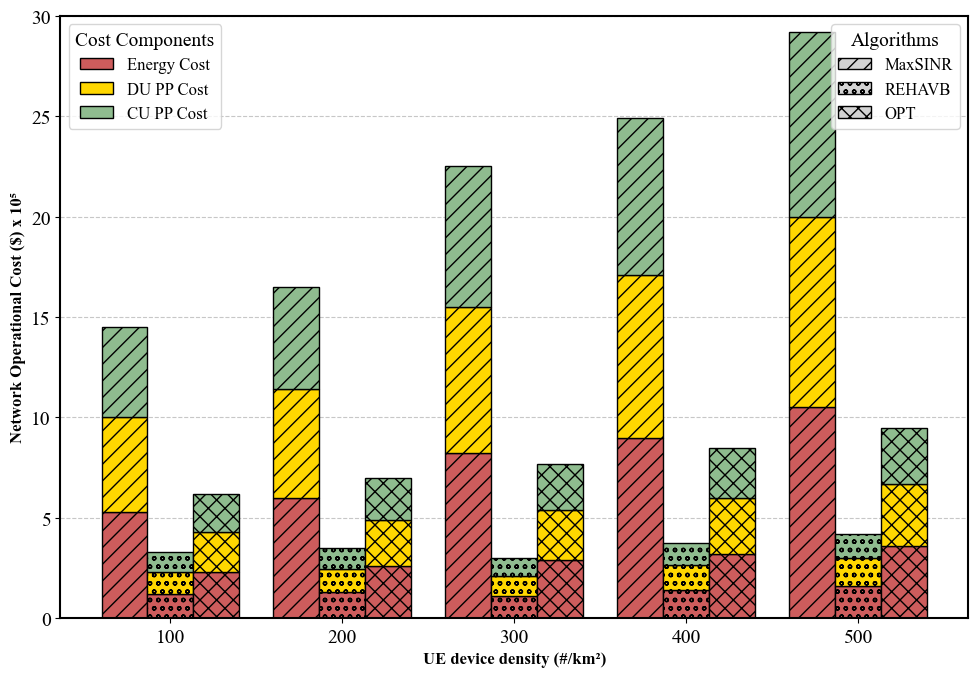

In [9]:
# --- 1. Parameters ---
NumGroupsPerAxis = 5   # e.g., densities 100–500
NumStacksPerGroup = 3   # e.g., MaxSINR, REHAVB, OPT
NumStackLayers = 3      # e.g., Energy, DU, CU

groupLabels = ['100', '200', '300', '400', '500']
stackLabels = ['Energy Cost', 'DU PP Cost', 'CU PP Cost']
group_bar_labels = ['MaxSINR', 'REHAVB', 'OPT']
hatches = ['//', 'oo', 'xx']
colors = ['indianred', 'gold', 'darkseagreen']

# --- 2. Generate Random Data (or load from CSV) ---
# Random example data scaled to realistic cost magnitudes
stackDataI = np.random.rand(NumGroupsPerAxis, NumStacksPerGroup, NumStackLayers) * 6

stackDataI = np.zeros((5, 3, 3))

stackDataI[:, 0, :] = np.array([
    [5.3, 4.7, 4.5],   # 100
    [6.0, 5.4, 5.1],   # 200
    [8.25, 7.25, 7.04],# 300
    [9.0, 8.1, 7.8],   # 400
    [10.5, 9.5, 9.2]   # 500
])

stackDataI[:, 1, :] = np.array([
    [1.2, 1.1, 1.0],
    [1.3, 1.15, 1.05],
    [1.1, 1.0, 0.9],
    [1.4, 1.25, 1.1],
    [1.6, 1.4, 1.2]
])

stackDataI[:, 2, :] = np.array([
    [2.3, 2.0, 1.9],
    [2.6, 2.3, 2.1],
    [2.9, 2.5, 2.3],
    [3.2, 2.8, 2.5],
    [3.6, 3.1, 2.8]
])

# To read from a CSV instead (optional):
# df = pd.read_csv('cost_data.csv')
# stackDataI = df[['col1','col2','col3',...]].values.reshape(NumGroupsPerAxis, NumStacksPerGroup, NumStackLayers)

# --- 3. Bar positioning setup ---
groupBins = np.arange(1, NumGroupsPerAxis + 1)
MaxGroupWidth = 0.8
groupOffset = MaxGroupWidth / NumStacksPerGroup

fig, ax = plt.subplots(figsize=(10, 7))

# --- 4. Plot grouped stacked bars ---
for i in range(NumStacksPerGroup):
    Y = stackDataI[:, i, :]
    internalPosCount = (i + 1) - ((NumStacksPerGroup + 1) / 2.0)
    groupDrawPos = (internalPosCount * groupOffset) + groupBins
    bottom = np.zeros(NumGroupsPerAxis)

    for j in range(NumStackLayers):
        ax.bar(groupDrawPos,
               Y[:, j],
               width=groupOffset,
               bottom=bottom,
               color=colors[j],
               hatch=hatches[i],
               edgecolor='black')
        bottom += Y[:, j]

# --- 5. Axes and style ---
ax.set_ylim(0, 30)
ax.set_xlabel('UE device density (#/km²)', fontweight='bold', fontsize=12)
ax.set_ylabel('Network Operational Cost ($) x 10⁵', fontweight='bold', fontsize=12)
ax.set_xticks(groupBins)
ax.set_xticklabels(groupLabels)
ax.grid(True, axis='y', linestyle='--', alpha=0.7)
ax.set_axisbelow(True)

# --- 6. Legends ---
# Legend 1: Colors only (no hatches)
color_handles = [
    mpatches.Patch(facecolor=colors[j], edgecolor='black', label=stackLabels[j])
    for j in range(NumStackLayers)
]
leg1 = ax.legend(handles=color_handles,
                 loc='upper left',
                 fontsize=12,
                 title="Cost Components")

# Legend 2: Hatches only (lightgray fill)
patch_handles = [
    mpatches.Patch(facecolor='lightgray',
                   edgecolor='black',
                   hatch=hatches[i],
                   label=group_bar_labels[i])
    for i in range(NumStacksPerGroup)
]
leg2 = ax.legend(handles=patch_handles,
                 loc='upper right',
                 fontsize=12,
                 title="Algorithms")

# Add first legend back after creating second
ax.add_artist(leg1)

fig.tight_layout()
plt.show()

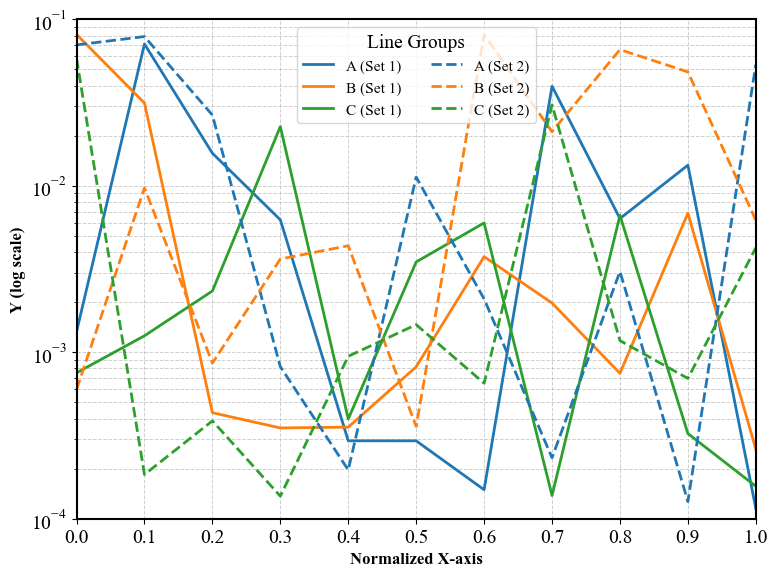

In [6]:
# --- 1. Data setup ---
x = np.arange(0.0, 1.01, 0.1)
np.random.seed(42)

# Generate example y data (ensuring within 10^-4 to 10^-1)
y_data = [10**(-4 + np.random.rand(len(x)) * 3) for _ in range(6)]

# --- 2. Define styles ---
colors = ['tab:blue', 'tab:orange', 'tab:green']
linestyles = ['-', '--']  # solid for Set 1, dashed for Set 2
labels = ['A (Set 1)', 'B (Set 1)', 'C (Set 1)', 'A (Set 2)', 'B (Set 2)', 'C (Set 2)']

# --- 3. Plotting ---
fig, ax = plt.subplots(figsize=(8, 6))

for i in range(6):
    color = colors[i % 3]
    style = linestyles[i // 3]
    ax.plot(x, y_data[i], linestyle=style, color=color, linewidth=2, label=labels[i])

# --- 4. Axis configuration ---
ax.set_yscale('log')
ax.set_ylim(1e-4, 1e-1)
ax.set_xlim(0, 1.0)

ax.set_xlabel('Normalized X-axis', fontsize=12, fontweight='bold')
ax.set_ylabel('Y (log scale)', fontsize=12, fontweight='bold')
ax.set_xticks(np.arange(0.0, 1.1, 0.1))

# --- 5. Legend and grid ---
ax.legend(fontsize=11, loc='best', ncol=2, title='Line Groups')
ax.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.6)

fig.tight_layout()
plt.show()